In [1]:
# SYMPY code for ee-Z-WW (s-channel) amplitude and total cross-section

In [2]:
#!python -m pip install sympy

In [3]:
from sympy import *
import prof_berger.heppackv0 as hep 
import numpy as np


Reading heppackv0.py (March 2023)

Done


### Auxiliary Functions

In [4]:
from sympy import symbols, sqrt, assuming, Q

def find_symbol(expr, target: str):
    symb_lst = list(expr.free_symbols)
    names_lst = []
    if len(symb_lst) > 0: 
        for symbol in expr.free_symbols:
            
            names_lst.append(symbol.name)

            if symbol.name in target:
                return symbol
            
            else:
                pass
        
        # print(f"Symbol {target} not found. \n The symbols in the expression are {expr.free_symbols}")
                #pass
        # print(f"Symbol {target} not found. \n The symbols in the expression are {expr.free_symbols}")
        # return None
        return symbols(target, real=True, positive=True)
    # symbol not found, create the same
    else:
        return symbols(target, real=True, positive=True)

# Unify the symbols of different expressions
def unify_symbols(expr1, expr2):
    symbols_expr1 = set([x.name for x in expr1.free_symbols])
    symbols_expr2 = set([x.name for x in expr2.free_symbols])

    common_symbols = symbols_expr1.intersection(symbols_expr2)
    #print(common_symbols)

    symbol_mapping = {}
    for symbol in common_symbols:
        new_symbol = Symbol(symbol)
        symbol_mapping[symbol] = new_symbol

    #print(symbol_mapping)
    expr1 = expr1.subs(symbol_mapping)
    expr2 = expr2.subs(symbol_mapping)

    return expr1, expr2

# Define LaTeX expressions
# Parse the LaTeX expressions - EXAMPLE
# Unify symbols with the same text names
#unified_expr1, unified_expr2 = unify_symbols(expr1, expr2)
#dl.replace(dl.args[1].args[0], n)
#print("Unified Expression 1:", unified_expr1)
#print("Unified Expression 2:", unified_expr2)

# Steps for SYMPY calculation

--> The following calculations were based on Prof. Christoph Berger work and functions for HEP calculation on Sympy.

-> Modifications by me, for the original, see his notebooks. https://profchristophberger.com/lehrbuch-elementarteilchenphysik/python/

---
---
---

## Process: $ H(q) \to W^-_0(k_1)+W^+_0(k_2)$

### Symbols, vectors and constants


In [5]:
## latex symbols doesn't need "$" 
theta, phi = symbols('theta phi')

s, t, u, p, s0, t0, u0, Gamma = symbols('s t u p s_0 t_0 u_0 Gamma', real=True, positive=True)

Mmed, mf= symbols(r'M_{med} m_f', real=True, positive=True)

## Extra terms

Etot, E1, E2, m1, m2 = symbols(r'E_tot E_1 E_2 m_1 m_2', real=True, positive=True)

# Electroweak constants
#cv, ca, gz, gw, thetaw, gz_theta, gw_theta = symbols(r'c_v c_a g_Z g_W theta_W g_Z_theta g_W_theta', real=True, positive=True )


#E1, E2, E3, E4, theta2, theta3, Mi, Mf, gx = symbols(r'E_1  E_2 E_3 E_4 theta_2 theta_3 M_i M_f g_{\chi}', real=True, positive=True)


---
# Decay width Z -> WW

In [6]:
pi

In [7]:
# 2 -> 2 process, p1, p2 -> q -> k1, k2
#p1 = Matrix([sqrt(s)/2, 0, 0, 0])
#p2 = Matrix([sqrt(s)/2, 0, pi, pi])

# vectors defined  as E, m, theta, phi

#k = Matrix([sqrt(s), Mmed, 0, 0])
#p3 = Matrix([(Mmed**2)/2, mf, theta, 0])
#p4 = Matrix([(Mmed**2)/2, mf, -theta, phi])

k = Matrix([0, Mmed, 0, 0])

p3 = Matrix([sqrt(s)/2, mf,  0,  0])
p4 = Matrix([sqrt(s)/2, mf, pi,  pi])

# ki=[Mi,Mi,0,0]
# pout=[E1,Mf,0,0]
# kf=[E3,0,theta3,0]
# pf=[E2,0,theta2,0]


In [8]:
# def Vvertex(ki, p3, p4, h3, h4, hk, gx, conjugate = False):



#     ## Vertex(mu, nu, lamb) * eps(ki, mu) * eps(p3, nu) * eps(p4, lamb)
#     # k - incoming
#     # p3 - out
#     # p4 - out
#     ## Followin Quigg book (Gauge Theories of Strong, Weak and Electromagnetic Interactions, 2ed 2013), page 131
#     p = hep.fourvec(ki)   # mu, GeV 
#     q = hep.fourvec(- p3) # nu, GeV
#     k = hep.fourvec(- p4) # gamma,  GeV

#     t1 =  p - q # GeV
#     t2 =  k - p # GeV
#     t3 =  q - k # GeV


#     if conjugate:
#         eps3 = hep.pol(- p3, h3) # 0
#         eps4 = hep.pol(- p4, h4) # 0
#         epsk = hep.polbar(ki, hk) # 0
#         Im = - I

#     else: 
#         eps3 = hep.polbar(- p3, h3) # 0
#         eps4 = hep.polbar(- p4, h4) # 0
#         epsk = hep.pol(ki, hk) # 0
#         Im =  I

#     #gµν  (p – q)λ + gλµ  (k – p)ν + gνλ  (q – k)µ    e(k, µ) e(3, ν) e(4, λ)
#     epst1 =  hep.dotprod4(t1, eps4)   * hep.dotprod4(eps3, epsk)  # GeV
#     epst2 =  hep.dotprod4(t2, eps3)   * hep.dotprod4(eps4, epsk)  # GeV
#     epst3 =  hep.dotprod4(eps3, eps4) * hep.dotprod4(t3, epsk)    # GeV

#     res = epst1 + epst2 + epst3 # GeV
        

#     return Im * gx * simplify(res) # Matrix(elms)


In [19]:
def get_amp_squared_Gamma(prop, u3, p3, u4, p4):
    Tems_func = hep.decaimento_Gamma(prop, u3, p3, u4, p4) 
    # Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
    # Some auxiliar variables
    beta, xi = symbols(r'beta xi', real=True, positive=True)
    
    sum_terms = 0
    for T in Tems_func:
        s = find_symbol(T, r's')
        mf = find_symbol(T, r'm_f')

        res = T
        res = T.subs(sqrt(s - 4*mf**2), xi).subs(sqrt(-sqrt(s) + 2*mf), beta)
        sum_terms +=  res * conjugate(res) ## Summing Squared

    # Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
    squared_result = sum_terms #/ 4 # Averaging over the incoming helicities
    
    # # Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
    # Tres_DM = Tres / 4 # Averaging over the incoming helicities

    # get back to the original form
    squared_result = nsimplify(expand(squared_result)).subs(xi, sqrt(s - 4*mf**2)).subs(beta, sqrt(-sqrt(s) + 2*mf))  ## simplify

    # last simplification
    #amp_squared = simplify(squared_result)
    #amp_squared = collect(collect(amp_squared, s), mf)

    return simplify(squared_result)

In [10]:
def Gamma_decay(amp_squared):
    # O prefator cinemático para gama é 
    prefact_decay = (1/(16*pi*Mmed))*sqrt(1 - (mf + mf)**2/Mmed**2)*sqrt(1 - (mf - mf)**2/Mmed**2)
    # Portanto, teremos que 

    Gamma_expr = prefact_decay  * amp_squared #/4#/ (12) # averagin over the initial states

    return Gamma_expr

In [11]:
MW, v, MH, MZ, lamb, GF, gw, e, thetaw= symbols(r'M_W \nu M_H M_Z \lambda G_F g_W e theta_W', real=True, positive=True)

# H -> ff

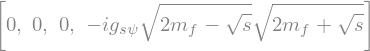

In [12]:
hep.decaimento_Gamma('scalar', 'ubar', -p3, 'v', -p4) 

In [20]:
amp_sqr = get_amp_squared_Gamma('scalar', 'ubar', -p3, 'v', -p4) 
amp_sqr

'- pol Matrix([[0], [sqrt(2)/2], [sqrt(2)*I/2], [0]])'

'- pol Matrix([[0], [sqrt(2)/2], [sqrt(2)*I/2], [0]])'

'- pol Matrix([[0], [sqrt(2)/2], [sqrt(2)*I/2], [0]])'

'- pol Matrix([[0], [sqrt(2)/2], [sqrt(2)*I/2], [0]])'

'0 pol Matrix([[-sqrt(-m_f**2 + s/4)/m_f], [0], [0], [sqrt(s)/(2*m_f)]])'

'0 pol Matrix([[-sqrt(-m_f**2 + s/4)/m_f], [0], [0], [sqrt(s)/(2*m_f)]])'

'0 pol Matrix([[-sqrt(-m_f**2 + s/4)/m_f], [0], [0], [sqrt(s)/(2*m_f)]])'

'0 pol Matrix([[-sqrt(-m_f**2 + s/4)/m_f], [0], [0], [sqrt(s)/(2*m_f)]])'

'+ pol Matrix([[0], [sqrt(2)/2], [-sqrt(2)*I/2], [0]])'

'+ pol Matrix([[0], [sqrt(2)/2], [-sqrt(2)*I/2], [0]])'

'+ pol Matrix([[0], [sqrt(2)/2], [-sqrt(2)*I/2], [0]])'

'+ pol Matrix([[0], [sqrt(2)/2], [-sqrt(2)*I/2], [0]])'

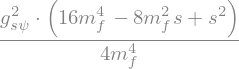

In [70]:
amp_sqr = get_amp_squared_Gamma('scalar', 'polbar', -p3, 'pol', -p4) 
amp_sqr

In [14]:
#hep.decaimento_Gamma('scalar', 'polbar', p3, 'polbar', p4) 

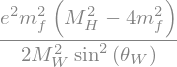

In [67]:
gw = ( e * mf )/ ( sqrt(2)*  MW * sin(thetaw))
mhiggs = -MH**2 + 8*mf**2
list(amp_sqr.free_symbols)[0]
# gHps = (2*MW**2)/(MH/ sqrt(2*lamb))
# gHps

simplify(expand(amp_sqr.subs(list(amp_sqr.free_symbols)[0], gw).subs(s, mhiggs)))

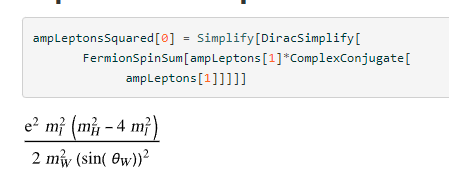

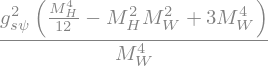

In [14]:
list(amp_sqr.free_symbols)[1]

In [115]:
list(amp_sqr.free_symbols)[0]

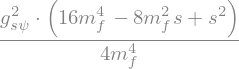

In [76]:
amp_sqr

In [113]:
gw = 1 #( e *  MW  )/ (  sin(thetaw))
mhiggs = - (-3)*MH**2 + 2*mf**2

# gHps = (2*MW**2)/(MH/ sqrt(2*lamb))
# gHps

expre = simplify(expand(amp_sqr.subs(mf, MW)))

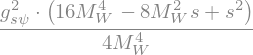

In [114]:
expre

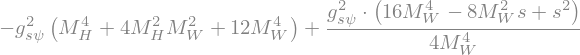

In [116]:
expre - (4*MH**2 *MW**2 + MH**4 + 12*MW**4) * list(amp_sqr.free_symbols)[0]**2

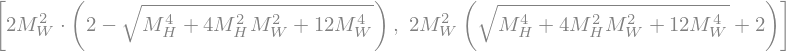

In [119]:
solve(expre - (4*MH**2 *MW**2 + MH**4 + 12*MW**4) * list(amp_sqr.free_symbols)[0]**2, s)

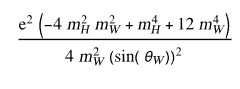

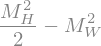

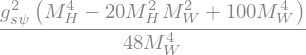

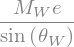

In [16]:
gw

In [55]:
GM = Gamma_decay(amp_sqr)

In [43]:
list(GM.free_symbols)[2]

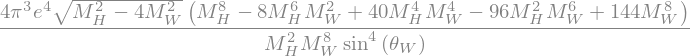

In [75]:
simplify(Gamma_decay(amp_sqr).subs(s, Mmed**2).subs(Mmed, MH).subs(mf, MW).subs(list(GM.free_symbols)[2], gw)) #.subs(MH**2, MW**2*(sin(theta)**2)/GF))

In [6]:
Terms = []
for pol3 in [-1, 0 , 1]:
    print(f'primeira pol está em {pol3}')
    for pol4 in [-1, 0, 1]:
        for polk in [-1, 0, 1]:
            res = Vvertex(k, p3, p4, pol3, pol4, polk, gx, conjugate = False ) * Vvertex(k, p3, p4, pol3, pol4, polk, gx, conjugate = True)
            Terms.append(simplify(res))

primeira pol está em -1
primeira pol está em 0
primeira pol está em 1


In [7]:
sum_T = 0

for term in Terms:
        sum_T += term

In [14]:
beta, xi = symbols("beta xi", positive = True, real = True)

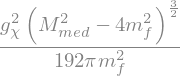

In [18]:
new  = simplify(expand(Gamma_vec.subs(s, Mmed**2)))
new 

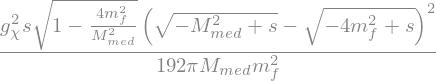

In [15]:
Gamma_vec.subs(sqrt(- lst[0]**2 + lst[3]), xi).subs(sqrt(- 4*lst[2]**2 + lst[3] ), beta)

In [19]:
latex(new )

'\\frac{g_{\\chi}^{2} \\left(M_{med}^{2} - 4 m_{f}^{2}\\right)^{\\frac{3}{2}}}{192 \\pi m_{f}^{2}}'

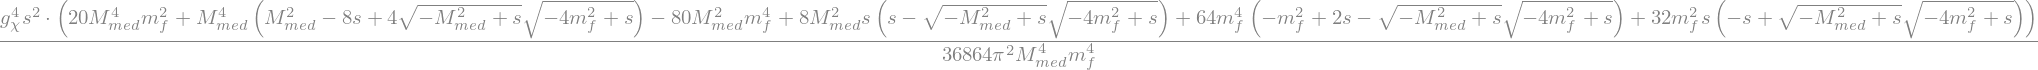

In [18]:
simplify(expand(Gamma_vec.subs(xi, sqrt(s - Mmed**2)).subs(beta, sqrt(s - 4*mf**2))**2))

In [19]:
Gamma_func = lambdify((s, Mmed, mf, gx), new , 'numpy')

In [20]:
# Obtendo o código fonte da função
codigo_fonte = {}


#codigo_fonte['SM'] = sigma_SM_func
codigo_fonte['DM'] = Gamma_func
#codigo_fonte['DM_noqq'] = sigma_DM_noqq_func

import inspect
for name, func in codigo_fonte.items():

    print(inspect.getsource(func))

def _lambdifygenerated(s, M_med, m_f, Dummy_22):
    return (1/192)*Dummy_22**2*(M_med**2 - 4*m_f**2)**(3/2)/(pi*m_f**2)



In [121]:
#Gamma_vec = nsimplify(expand(Gamma_vec))

## Some functions to give a pretier expression
Gamma_vec =  together((nsimplify(expand(Gamma_vec))))

In [ ]:
xi, beta = symbols(r'xi beta')

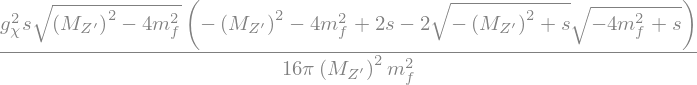

In [128]:
together(collect(expand(Gamma_vec), s )).subs(xi, sqrt(MZp **2 - 4))

###  